In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle

In [2]:
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [3]:
from dask import dataframe as dd
import joblib
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
cluster.scheduler, cluster.workers

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64413 instead
  warnings.warn(


(<Scheduler: "tcp://127.0.0.1:64416" processes: 3 cores: 6>,
 {0: <Nanny: tcp://127.0.0.1:64438, threads: 2>,
  1: <Nanny: tcp://127.0.0.1:64441, threads: 2>,
  2: <Nanny: tcp://127.0.0.1:64435, threads: 2>})

In [4]:
train_X = pd.read_pickle('DFs/train_test/train_X.pkl')
train_y = pd.read_pickle('DFs/train_test/train_y.pkl')
test_X = pd.read_pickle('DFs/train_test/test_X.pkl')
test_y = pd.read_pickle('DFs/train_test/test_y.pkl')

In [5]:
f = open(r'DFs/train_test/participants.pkl', 'rb')
participants = pickle.load(f)
f.close()

In [6]:
from model_prep import score_model

In [7]:
from model_prep import plot_predictions

# ADA Regressor OOB

In [8]:
ada = AdaBoostRegressor()
pca50 = PCA(n_components=50)
train_X_pca50 = pca50.fit_transform(train_X)
test_X_pca50 = pca50.transform(test_X)
with joblib.parallel_backend('dask'):
    ada.fit(train_X_pca50, train_y) 

In [9]:
ada_scores = {'model':[],'par':[],'MAPE':[], 'MAE':[]}
for param in ada.get_params():
    ada_scores[param]=[]

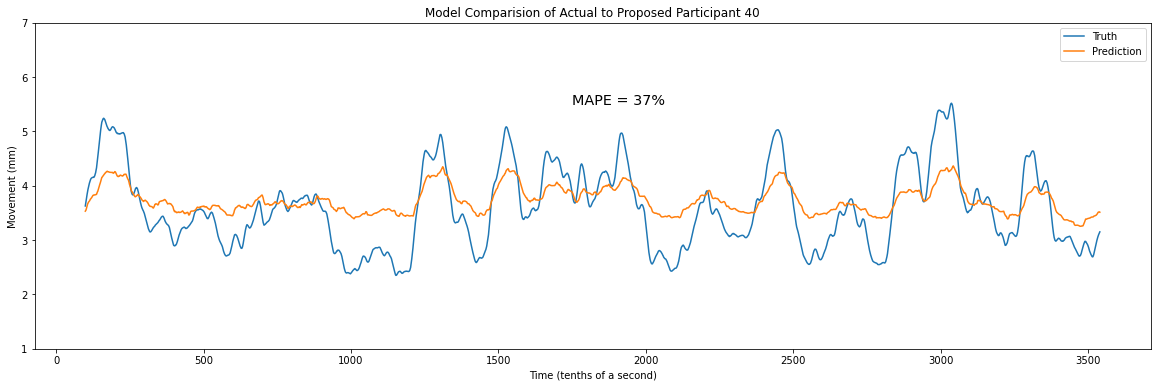

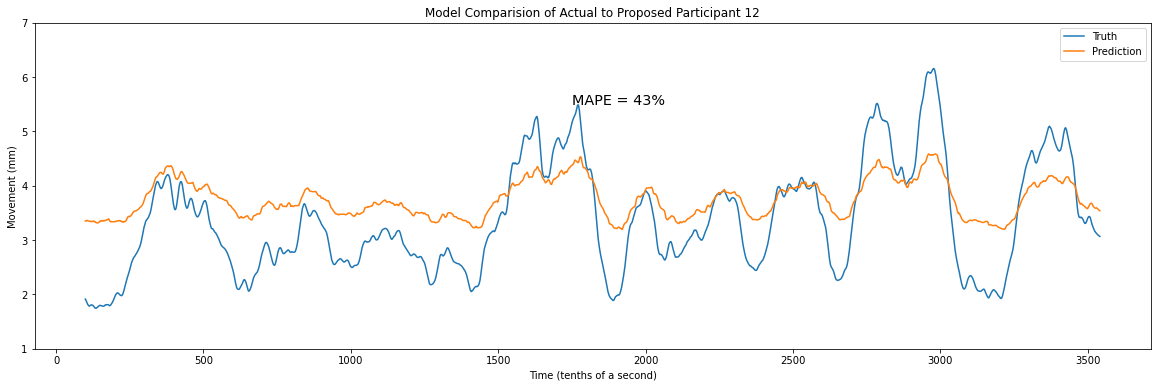

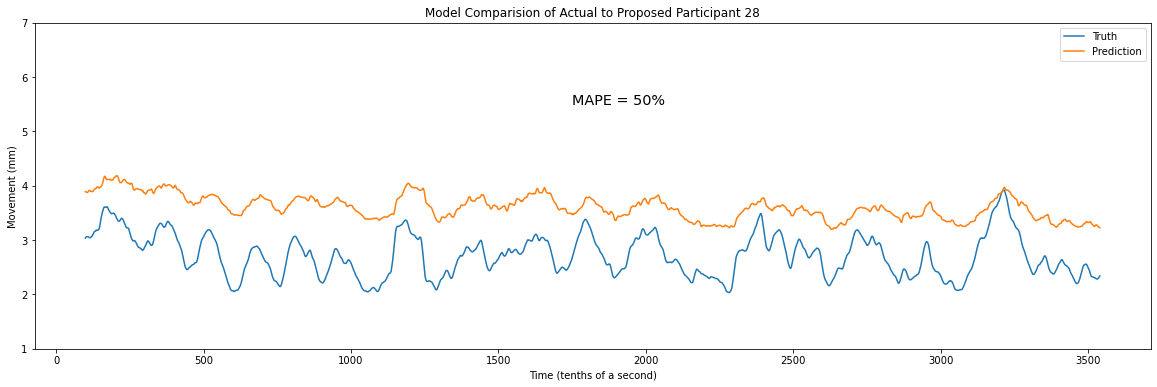

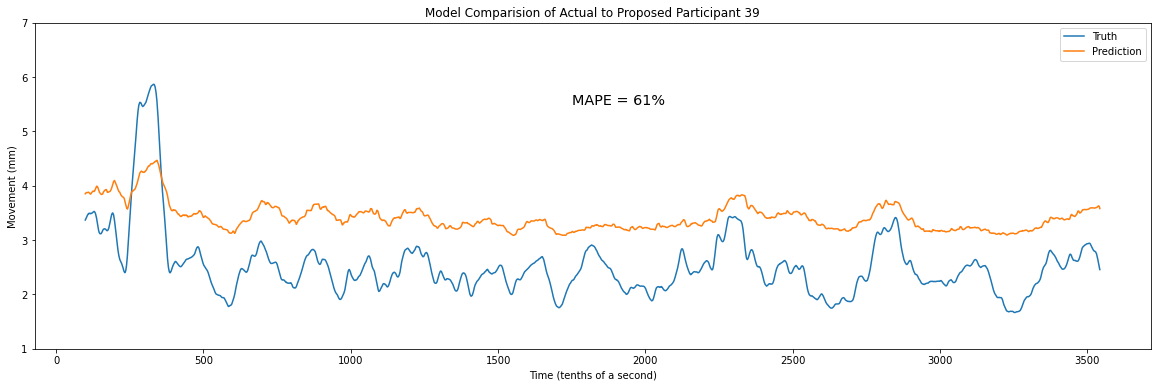

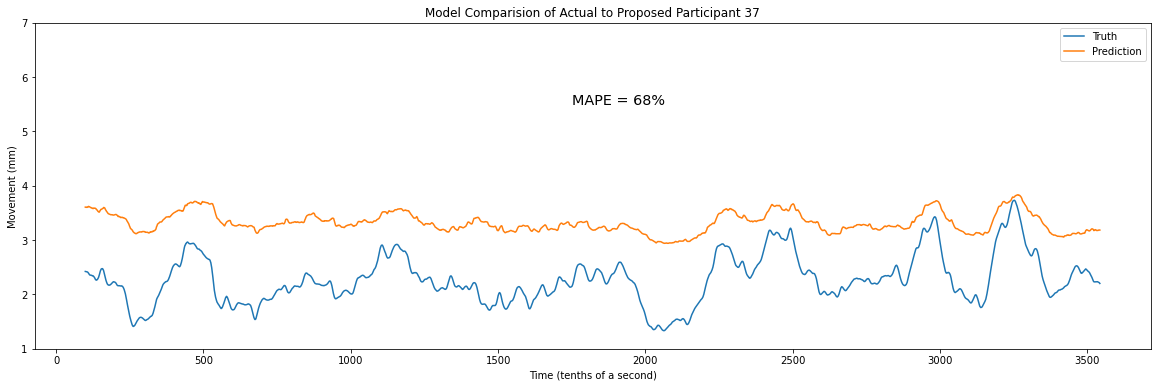

In [10]:
results, ada_scores = score_model(ada, participants=participants, test_y=test_y, test_X=test_X_pca50, 
                      model_name='ADA', log = ada_scores)
plot_predictions(results, participants)

# ADA Regressor LR = 5

In [11]:
ada_lr5 = AdaBoostRegressor(learning_rate=5)
pca50 = PCA(n_components=50)
train_X_pca50 = pca50.fit_transform(train_X)
test_X_pca50 = pca50.transform(test_X)
with joblib.parallel_backend('dask'):
    ada_lr5.fit(train_X_pca50, train_y) 

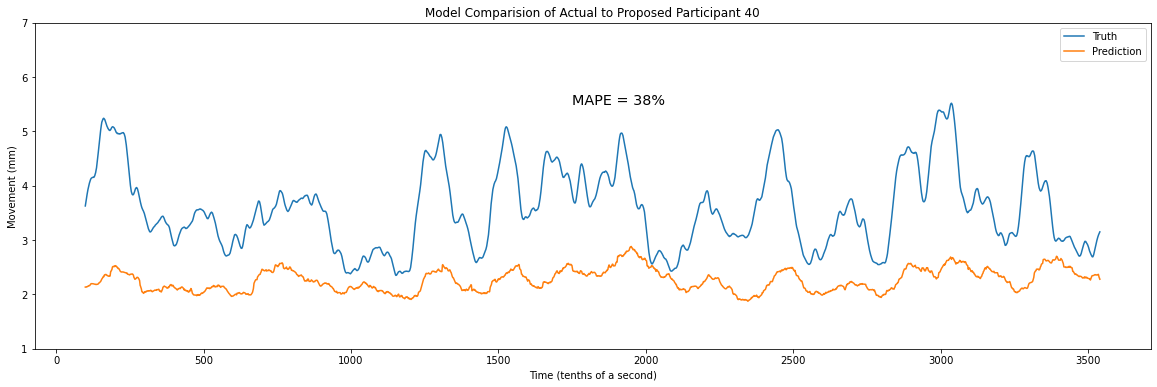

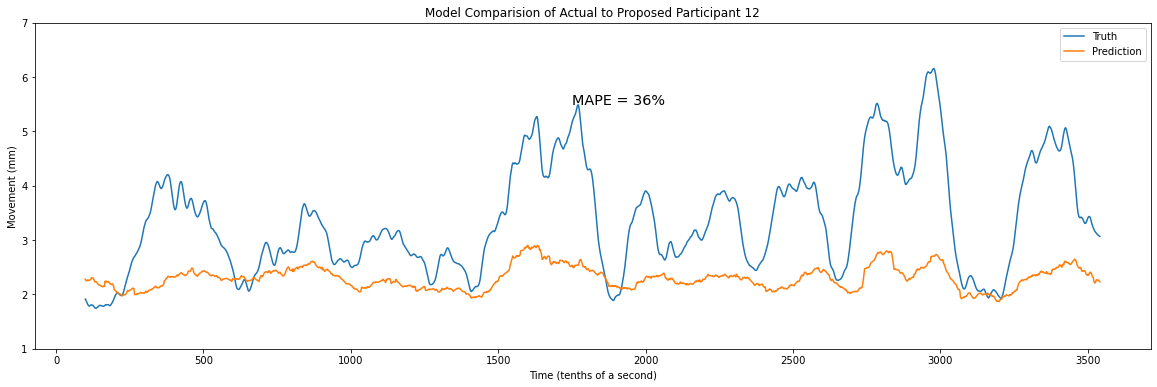

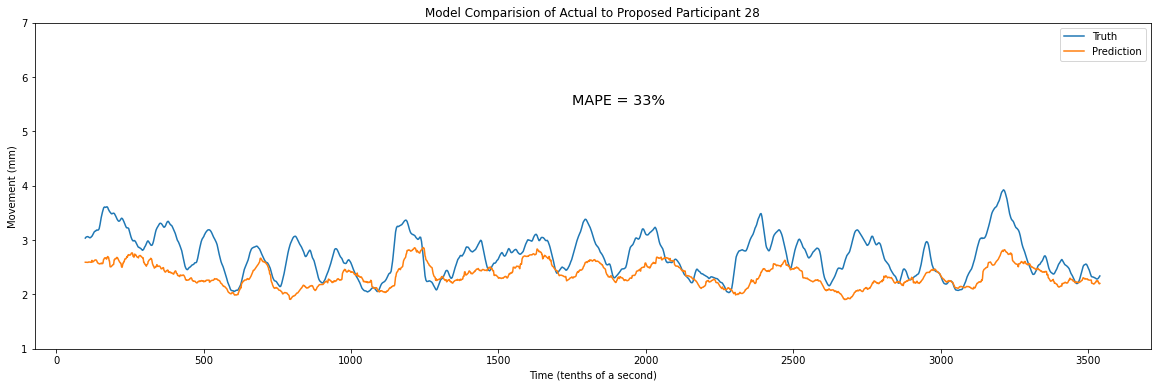

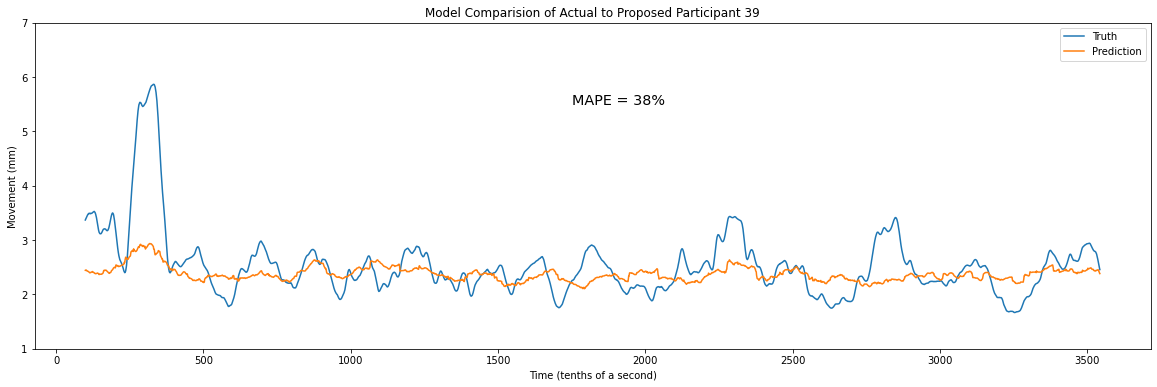

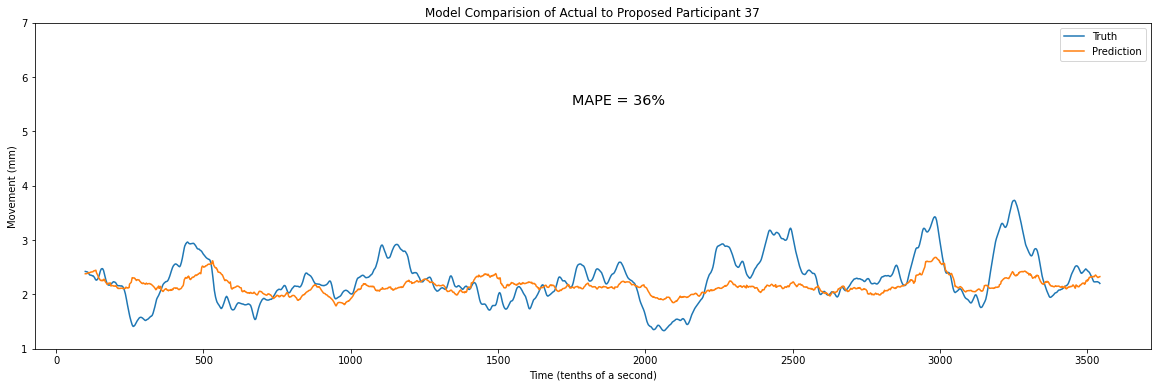

In [12]:
results, ada_scores = score_model(ada_lr5, participants=participants, test_y=test_y, test_X=test_X_pca50, 
                      model_name='ADA_lr5', log = ada_scores)
plot_predictions(results, participants)

# ADA Regressor LR = 0.2

In [13]:
ada_lr5 = AdaBoostRegressor(learning_rate=0.2)
pca50 = PCA(n_components=50)
train_X_pca50 = pca50.fit_transform(train_X)
test_X_pca50 = pca50.transform(test_X)
with joblib.parallel_backend('dask'):
    ada_lr5.fit(train_X_pca50, train_y) 

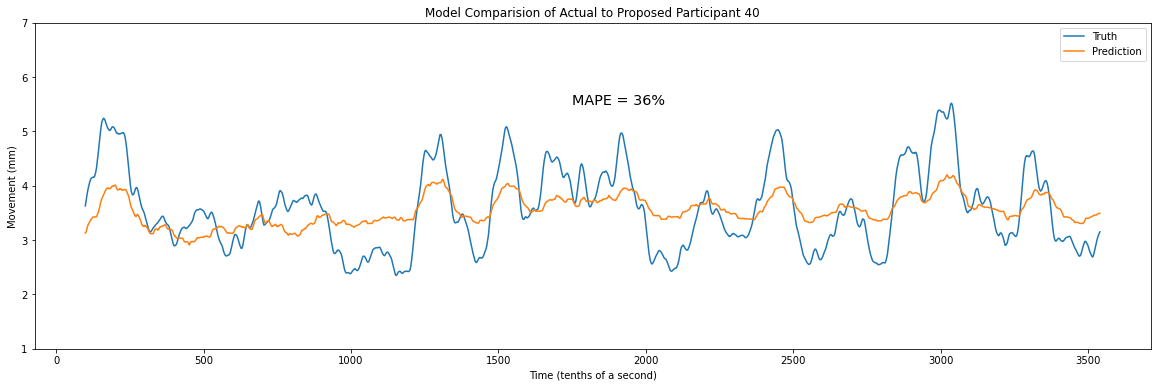

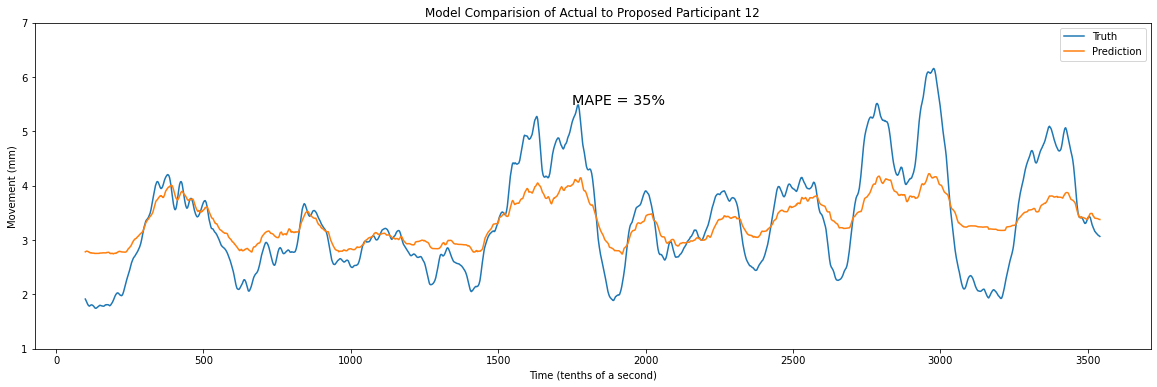

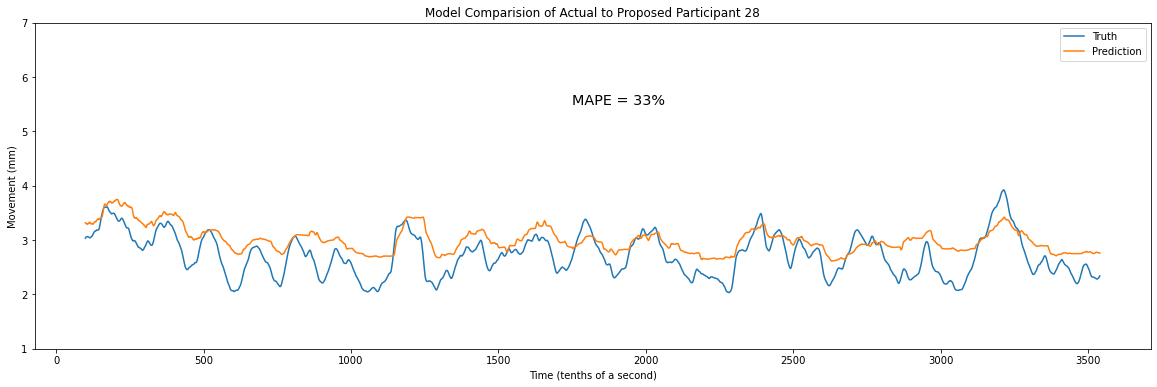

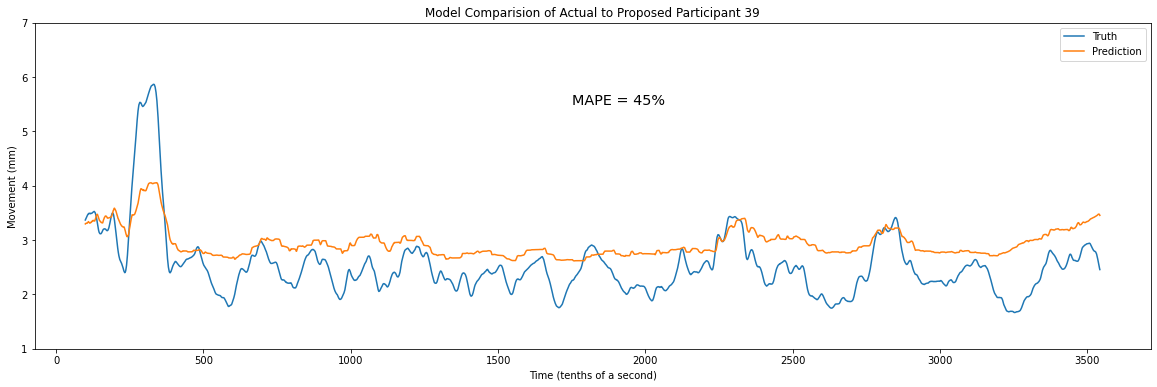

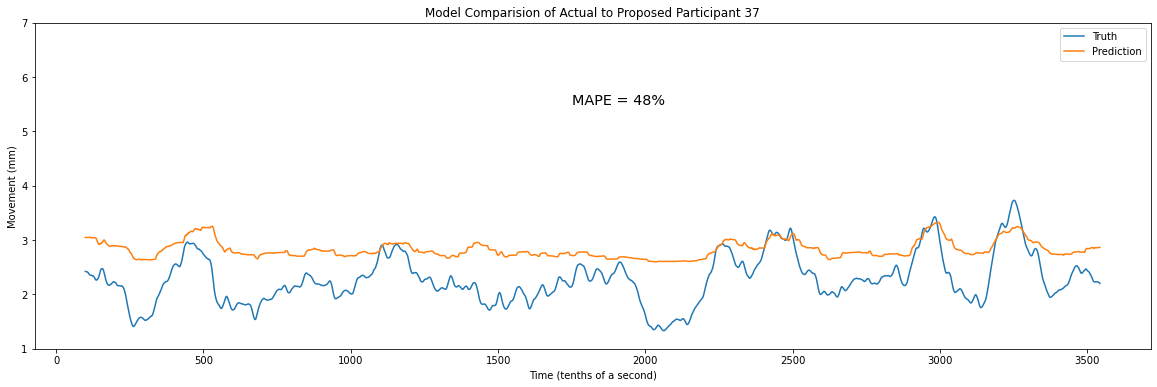

In [14]:
results, ada_scores = score_model(ada_lr5, participants=participants, test_y=test_y, test_X=test_X_pca50, 
                      model_name='ADA_lr0.2', log = ada_scores)
plot_predictions(results, participants)

In [15]:
ada_df = pd.DataFrame(ada_scores)

In [16]:
ada_df.groupby(['par','model']).mean()

MAPE       MAE  learning_rate  n_estimators
par model                                                     
12  ADA        0.431767  1.072343            1.0            50
    ADA_lr0.2  0.355101  0.978528            0.2            50
    ADA_lr5    0.360165  1.325213            5.0            50
28  ADA        0.509285  1.055778            1.0            50
    ADA_lr0.2  0.338790  0.740329            0.2            50
    ADA_lr5    0.331657  0.887897            5.0            50
37  ADA        0.683362  1.167303            1.0            50
    ADA_lr0.2  0.485859  0.837727            0.2            50
    ADA_lr5    0.360107  0.752859            5.0            50
39  ADA        0.611784  1.130371            1.0            50
    ADA_lr0.2  0.457989  0.881151            0.2            50
    ADA_lr5    0.382746  0.876105            5.0            50
40  ADA        0.377892  1.079934            1.0            50
    ADA_lr0.2  0.365609  1.093966            0.2            50
    ADA_lr5    0.389395  1.554368            5.0            50

In [17]:
ada_df.groupby(['model']).mean()

,par,MAPE,MAE,learning_rate,n_estimators
model,,,,,
ADA,31.2,0.522818,1.101146,1.0,50.0
ADA_lr0.2,31.2,0.400670,0.906340,0.2,50.0
ADA_lr5,31.2,0.364814,1.079289,5.0,50.0


In [18]:
ada_df.to_pickle(r'DFs/scores/ada.pkl')